# We want to classify colored images into 10 classes. 


## installations

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#https://keras.io/
!pip install -q keras

In [0]:
import tensorflow as tf
import keras

import matplotlib
import matplotlib.pyplot as plt


from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,Convolution2D
from keras.layers import UpSampling2D, Reshape
from keras.layers import Conv2DTranspose
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical

import numpy as np
from keras.callbacks import TensorBoard



###Import the data

In [0]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
x_train[0][0][0]

array([59, 62, 63], dtype=uint8)

## Explore the data

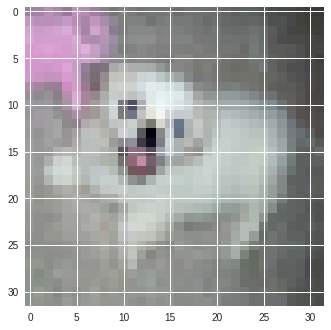

In [0]:
sample_id = 7000
plt.imshow(x_train [sample_id])

We have 50000 images in color of shape 32x32 pixels. There is one layer by color RGB.
Each pixel can take a value between 0 and 255.

In [0]:
print(x_train.shape) 
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


y_train[i] contain the class of the image in x_train[i]

In [0]:
min(y_train)

array([9], dtype=uint8)

In [0]:
max(y_train)

array([0], dtype=uint8)

In [0]:
import collections

for i in range(0,10):
  print("number of images of class ",i,":")
  print(sum(y_train==i),"\n")
  

number of images of class  0 :
[5000] 

number of images of class  1 :
[5000] 

number of images of class  2 :
[5000] 

number of images of class  3 :
[5000] 

number of images of class  4 :
[5000] 

number of images of class  5 :
[5000] 

number of images of class  6 :
[5000] 

number of images of class  7 :
[5000] 

number of images of class  8 :
[5000] 

number of images of class  9 :
[5000] 



We have ten classes with value between 0 and 9

Let's print one image of each class

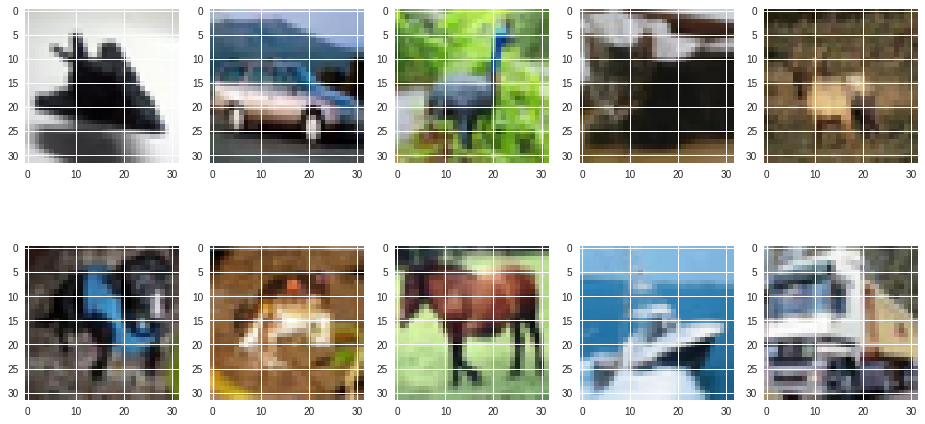

In [0]:
img_index=[]
for i in range (0,10):
  j=0
  while(y_train[j][0]!=i):
    j=j+1
  img_index.append(j)

fig=plt.figure(figsize=(16, 8))  
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    img = x_train[img_index[i-1]]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [0]:
names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
x_test.shape

(10000, 32, 32, 3)

  ## Data processing

We center the values between -1 and 1

In [0]:
x_train = (x_train - 127.5) / 127.5
x_test = (x_test - 127.5) / 127.5

Then we transform the y_train in 1 hot vectors. Since there is 10 classes, the vectors will be of length 10.

In [0]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)


###verify processing

In [0]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [0]:
y_train.shape 

(50000, 10)

In [0]:
x_train[0][0][0]

array([-0.5372549 , -0.51372549, -0.50588235])

#Multilayer perceptron

Multilayer perceptrons only use dense and dropout layers. Dense layers are used to fully connect the neurons, then dropout layers are used to select only the most relevant parameters and drop some connections. Every layer has to be activated with an activation function. Here I chose to use the relu function for all the hidden layers and the softmax function in the last layer. The softmax function is used to get values between 0 and 1, giving the probability for the image to belong to each class. Only use dense and droupout layers.

In [0]:

model1 = Sequential() 
#model.add(Flatten(input_shape=(32,32,3))) #chaque donne est une image de taille 32*32 en RGB
model1.add(Flatten(input_shape=(32,32,3)))

model1.add(Dense(512))         #On commence avec 512 neurones
model1.add(Activation('relu'))
model1.add(Dropout(0.2))				#on allege le modele en supprimant 20% des connexions du reseau de neurone

model1.add(Dense(256))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))


model1.add(Dense(10))					#il y a 10 classes, il faut 10 neurones en sortie
model1.add(Activation('softmax'))

In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________

In [0]:
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) #loss = categorical et pas binary car on a plus que 2 classes.#
history =model1.fit(x_train, y_train, batch_size=250, epochs=50, validation_data=(x_test, y_test)) 


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 261us/step - loss: 2.0386 - acc: 0.2678 - val_loss: 1.8292 - val_acc: 0.3653
Epoch 2/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.8409 - acc: 0.3493 - val_loss: 1.7296 - val_acc: 0.3990
Epoch 3/50
50000/50000 [==============================] - 13s 262us/step - loss: 1.7657 - acc: 0.3778 - val_loss: 1.6739 - val_acc: 0.4179
Epoch 4/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.7157 - acc: 0.3959 - val_loss: 1.6325 - val_acc: 0.4336
Epoch 5/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.6782 - acc: 0.4094 - val_loss: 1.6041 - val_acc: 0.4436
Epoch 6/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.6470 - acc: 0.4211 - val_loss: 1.5772 - val_acc: 0.4532
Epoch 7/50
50000/50000 [==============================] - 13s 255us/step - loss: 1.6194 - acc: 0.4318 - val_loss: 1.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


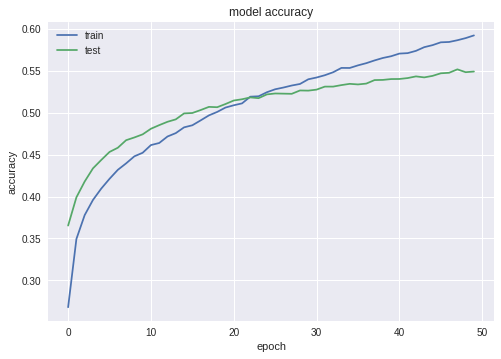

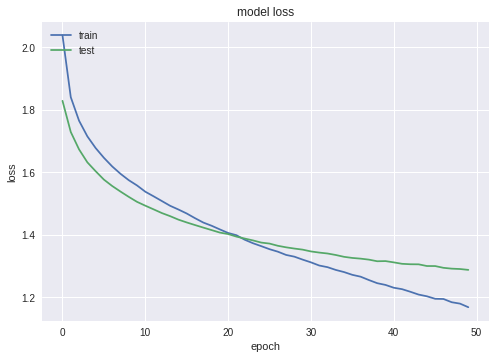

In [0]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model1.predict_classes(x_test)

array([3, 9, 8, ..., 3, 5, 7])

In [0]:
np.argmax( y_test ,axis=1)

array([3, 8, 8, ..., 5, 1, 7])

#Convolutional Network

https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py

In [0]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10))
model2.add(Activation('softmax'))


model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [0]:
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 


In [0]:

history2=model2.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test), shuffle=True,verbose=1) 





Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 282s 6ms/step - loss: 1.9702 - acc: 0.2746 - val_loss: 1.6518 - val_acc: 0.4006
Epoch 2/50
50000/50000 [==============================] - 283s 6ms/step - loss: 1.5990 - acc: 0.4120 - val_loss: 1.4196 - val_acc: 0.4833
Epoch 3/50
50000/50000 [==============================] - 282s 6ms/step - loss: 1.4484 - acc: 0.4753 - val_loss: 1.3103 - val_acc: 0.5335
Epoch 4/50
50000/50000 [==============================] - 282s 6ms/step - loss: 1.3463 - acc: 0.5158 - val_loss: 1.2332 - val_acc: 0.5636
Epoch 5/50
50000/50000 [==============================] - 286s 6ms/step - loss: 1.2664 - acc: 0.5453 - val_loss: 1.1883 - val_acc: 0.5837
Epoch 6/50
50000/50000 [==============================] - 284s 6ms/step - loss: 1.1959 - acc: 0.5753 - val_loss: 1.1142 - val_acc: 0.6078
Epoch 7/50
50000/50000 [==============================] - 285s 6ms/step - loss: 1.1370 - acc: 0.5994 - val_loss: 1.0193 - 

In [0]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: ignored

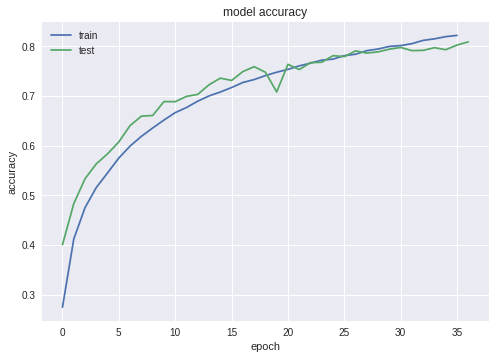

In [0]:

hist_acc_val= [0.4006,0.4833,0.5335,0.5636,0.5837,0.6078,0.6407,0.6596,0.6609,0.6889,0.6888,0.6994,0.7035,0.7228,0.7362,0.7315,0.7494,0.7593,0.7481, 0.7084,0.7640,0.7535,0.7674,0.7682,0.7815, 0.7796, 0.7911, 0.7867,0.7892,0.7945, 0.7981, 0.7916, 0.7922,0.7976,0.7935, 0.8029,0.8093]
hist_acc_test=[0.2746,0.4120,0.4753,0.5158, 0.5453,0.5753,0.5994,0.6189,0.6357,0.6517,0.6667,0.6770,0.6898,0.7004, 0.7082,0.7173 ,0.7274 ,0.7333 ,0.7413 ,0.7481,0.7538 ,0.7609 ,0.7664 ,0.7725 ,0.7745, 0.7815, 0.7844 ,0.7916 , 0.7949 ,0.8001 ,0.8018 ,0.8057 , 0.8123 ,0.8154 ,0.8198,0.8223]


# summarize history for accuracy
plt.plot(hist_acc_test)
plt.plot(hist_acc_val)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The computation takes a lot of time  but we have a 81% accuracy on the validation dataset after 38 epochs, starting from 40% 

# Using tensorflow DataFlow graph

I found this process in google: 
https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c

first define the dataflow graph, then create a TensorFlow session to run parts of the graph. This process is used id parallel programing

###Getting started with tensorflow

In [0]:
#inputs
pi=pi = tf.constant(3.14, name="pi")
r = tf.placeholder(tf.float32, name="r")
    
a = pi * r * r

In [0]:
#define the graph
graph = tf.get_default_graph()
print(graph.get_operations())

[<tf.Operation 'x' type=Placeholder>, <tf.Operation 'y' type=Placeholder>, <tf.Operation 'keep_prob' type=Placeholder>, <tf.Operation 'Placeholder' type=Placeholder>, <tf.Operation 'init' type=NoOp>, <tf.Operation 'pi' type=Const>, <tf.Operation 'r' type=Placeholder>, <tf.Operation 'mul' type=Mul>, <tf.Operation 'mul_1' type=Mul>]


* To evaluate the operation a=pi*r*r, we need to create and the run a session.

* You can provide values for placeholders defined earlier to the session as python dictionary where the key is your placeholder name and value can be a list.

In [0]:
with tf.Session() as sess:# creation of sess
  print(a.eval(feed_dict={r: 5})) #run of sess=a.eval, define the unknown variable with feed_dict={r: [5]}

78.5


## data load

In [0]:
import pickle


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [0]:
test=unpickle("drive/My Drive/Colab Notebooks/cifar-10-python/cifar-10-batches-py/test_batch")

batch1=unpickle("drive/My Drive/Colab Notebooks/cifar-10-python/cifar-10-batches-py/data_batch_1")
batch2=unpickle("drive/My Drive/Colab Notebooks/cifar-10-python/cifar-10-batches-py/data_batch_2")
batch3=unpickle("drive/My Drive/Colab Notebooks/cifar-10-python/cifar-10-batches-py/data_batch_3")
batch4=unpickle("drive/My Drive/Colab Notebooks/cifar-10-python/cifar-10-batches-py/data_batch_4")
batch5=unpickle("drive/My Drive/Colab Notebooks/cifar-10-python/cifar-10-batches-py/data_batch_5")

In [0]:
batch2[b'data'].shape

(10000, 3072)

## process data

In [0]:
# normalize the data and one hot encode the labels
test_data=test[b'data']
test_data=np.reshape(test_data, (10000,32,32,3))
test_data=(test_data -127.5) / 127.5

test_labels=to_categorical(test[b'labels'],10)


batch1_data=batch1[b'data']
batch1_data=np.reshape(batch1_data, (10000,32,32,3))
batch1_data=(batch1_data -127.5) / 127.5

batch1_labels=to_categorical(batch1[b'labels'],10)


batch2_data=batch2[b'data']
batch2_data=np.reshape(batch2_data, (10000,32,32,3))
batch2_data=(batch2_data -127.5) / 127.5

batch2_labels=to_categorical(batch2[b'labels'],10)


batch3_data=batch3[b'data']
batch3_data=np.reshape(batch3_data, (10000,32,32,3))
batch3_data=(batch3_data -127.5) / 127.5

batch3_labels=to_categorical(batch3[b'labels'],10)


batch4_data=batch4[b'data']
batch4_data=np.reshape(batch4_data, (10000,32,32,3))
batch4_data=(batch4_data -127.5) / 127.5

batch4_labels=to_categorical(batch4[b'labels'],10)


batch5_data=batch5[b'data']
batch5_data=np.reshape(batch5_data, (10000,32,32,3))
batch5_data=(batch5_data -127.5) / 127.5

batch5_labels=to_categorical(batch5[b'labels'],10)



In [0]:
test_data.shape

(10000, 32, 32, 3)

## define the variables

In [0]:
#reset tensorflow graph
tf.reset_default_graph()

#define the variable

#x: the input


#color
x = tf.placeholder(tf.float32, shape=(None, 32, 32, 3), name='x')

#y: the output
y =  tf.placeholder(tf.float32, shape=(None, 10), name='y')

#the rate of nodes to keep in Dropout layers, will be use in the fully connected layers
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

#Normalization parameter
training = tf.placeholder(tf.bool)

## Define the model

The entire model consists of 14 layers in total. In addition to layers below lists what techniques are applied to build the model.

 
    Convolution with 64 different filters in size of (3x3)
1. Convolution with 64 different filters in size of (3x3)
2.    Max Pooling by 2
    *   ReLU activation function
    *  Batch Normalization
3.   Convolution with 128 different filters in size of (3x3)
4.   Max Pooling by 2
        * ReLU activation function
        * Batch Normalization
5. Convolution with 256 different filters in size of (3x3)
6. Max Pooling by 2
     * ReLU activation function
     *  Batch Normalization
7. Convolution with 512 different filters in size of (3x3)
8. Max Pooling by 2
    * ReLU activation function
    * Batch Normalization
9. Flattening the 3-D output of the last convolutional operations
10. Fully Connected Layer with 128 units
       * Dropout
       * Batch Normalization
11. Fully Connected Layer with 256 units
      *  Dropout
      * Batch Normalization
12. Fully Connected Layer with 512 units
       * Dropout
       * Batch Normalization
13. Fully Connected Layer with 1024 units
       * Dropout
       * Batch Normalization
14. Fully Connected Layer with 10 units (number of image classes)

        

 


In [0]:
def conv_net(x, keep_prob):
  # shape = [filter size, filter size, number of input layers, number of output layers] stddev-> standard deviation
  
  # define the shape of each layer
    conv1_filter = tf.Variable(tf.truncated_normal(shape=[3, 3, 3, 64], mean=0, stddev=0.08))
    conv2_filter = tf.Variable(tf.truncated_normal(shape=[3, 3, 64, 128], mean=0, stddev=0.08))
    conv3_filter = tf.Variable(tf.truncated_normal(shape=[5, 5, 128, 256], mean=0, stddev=0.08))
    conv4_filter = tf.Variable(tf.truncated_normal(shape=[5, 5, 256, 512], mean=0, stddev=0.08))

    #The stride of the sliding window for each dimension of input
    # 1, 2
    conv1 = tf.nn.conv2d(x, conv1_filter, strides=[1,1,1,1], padding='SAME')
    conv1 = tf.nn.relu(conv1)
    conv1_pool = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    conv1_bn = tf.layers.batch_normalization(conv1_pool)

    # 3, 4
    conv2 = tf.nn.conv2d(conv1_bn, conv2_filter, strides=[1,1,1,1], padding='SAME')
    conv2 = tf.nn.relu(conv2)
    conv2_pool = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')    
    conv2_bn = tf.layers.batch_normalization(conv2_pool)
  
    # 5, 6
    conv3 = tf.nn.conv2d(conv2_bn, conv3_filter, strides=[1,1,1,1], padding='SAME')
    conv3 = tf.nn.relu(conv3)
    conv3_pool = tf.nn.max_pool(conv3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')  
    conv3_bn = tf.layers.batch_normalization(conv3_pool)
    
    # 7, 8
    conv4 = tf.nn.conv2d(conv3_bn, conv4_filter, strides=[1,1,1,1], padding='SAME')
    conv4 = tf.nn.relu(conv4)
    conv4_pool = tf.nn.max_pool(conv4, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    conv4_bn = tf.layers.batch_normalization(conv4_pool)
    
    # 9
    flat = tf.contrib.layers.flatten(conv4_bn)  

    # 10
    full1 = tf.contrib.layers.fully_connected(inputs=flat, num_outputs=128, activation_fn=tf.nn.relu)
    full1 = tf.nn.dropout(full1, keep_prob)
    full1 = tf.layers.batch_normalization(full1)
    
    # 11
    full2 = tf.contrib.layers.fully_connected(inputs=full1, num_outputs=256, activation_fn=tf.nn.relu)
    full2 = tf.nn.dropout(full2, keep_prob)
    full2 = tf.layers.batch_normalization(full2)
    
    # 12
    full3 = tf.contrib.layers.fully_connected(inputs=full2, num_outputs=512, activation_fn=tf.nn.relu)
    full3 = tf.nn.dropout(full3, keep_prob)
    full3 = tf.layers.batch_normalization(full3)    
    
    # 13
    full4 = tf.contrib.layers.fully_connected(inputs=full3, num_outputs=1024, activation_fn=tf.nn.relu)
    full4 = tf.nn.dropout(full4, keep_prob)
    full4 = tf.layers.batch_normalization(full4)        
    
    # 14
    out = tf.contrib.layers.fully_connected(inputs=full3, num_outputs=10, activation_fn=None)
    return out

## Train the model

First we choose the parameters of the training proces: epoch and batch size but also keep proba used in the model

In [0]:
epochs = 10
batch_size = 128
keep_probability = 0.7
learning_rate = 0.001

In [0]:
x

<tf.Tensor 'x:0' shape=(?, 32, 32, 3) dtype=float32>

In [0]:

logits = conv_net(x, keep_prob)
model = tf.identity(logits, name='logits') # Name logits Tensor, so that can be loaded from disk after training

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

In [0]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    session.run(optimizer, 
                feed_dict={
                    x: feature_batch,
                    y: label_batch,
                    keep_prob: keep_probability
                })

In [0]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    loss = sess.run(cost, 
                    feed_dict={
                        x: feature_batch,
                        y: label_batch,
                        keep_prob: 1.
                    })
    valid_acc = sess.run(accuracy, 
                         feed_dict={
                             x: valid_features,
                             y: valid_labels,
                             keep_prob: 1.
                         })
    
    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(loss, valid_acc))



In [0]:
def batch_features_labels(features, labels, batch_size):
    """
    Split features and labels into batches
    """
    for start in range(0, len(features), batch_size):
        end = min(start + batch_size, len(features))
        yield features[start:end], labels[start:end]




#### run session

In [0]:
batches=[batch1_data,batch2_data,batch3_data,batch4_data,batch5_data]
labels=[batch1_labels,batch2_labels,batch3_labels,batch4_labels,batch5_labels]

with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        for i in range(1, 6):
          batch_features=batches[i]
          batch_labels=labels[i]
          
          train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
                
          print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
print_stats(sess, batch_features, batch_labels, cost, accuracy)
   
  



###NOTE

This method doesn't work. I don't get any error but the part "run session" always eventually stop runing after a few seconds. I did not found where the problem was, maybe my computer is not powerfull enough.

#Using PCA

https://github.com/wikiabhi/Cifar-10/blob/master/cifar10_pca.ipynb

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

##Process and explore data

### transforming images in one dimention vectors

In [0]:
x_train_PCA = x_train.reshape(x_train.shape[0],-1)
x_test_PCA = x_test.reshape(x_test.shape[0], -1)

In [0]:
x_train_PCA.shape

(50000, 3072)

### transform labels from one hot encoding to scalar

In [0]:
def one_hot_to_scalar(matrix):
  if matrix.shape[1]==1:
    return matrix.flatten()
  else:
    matrix=matrix.tolist()
    vector=[]
    for i in range (0,len(matrix)):
      vector.append(matrix[i].index(max(matrix[i])))
    return np.asarray(vector)

In [0]:
y_train_PCA=one_hot_to_scalar(y_train)
y_test_PCA=one_hot_to_scalar(y_test)

In [0]:
y_train_PCA[0]

6

### reprensent data distribution with 2 components

In [0]:
pca = PCA(2)  
vect=pca.fit_transform(x_train_PCA)  

In [0]:
sum(pca.explained_variance_ratio_) 

0.4032977356759949

In [0]:
def get_class(classe,y_train,x_train):
  images=[]
  for i in range(0,500):
    if(y_train[i]==classe):
      images.append(x_train[i])
  return (images)

In [0]:
x_train_ordered=[]
for j in range (0,10):
  x_train_ordered.append(get_class(j,y_train_PCA,vect))


In [0]:
x_train_ordered=np.asarray(x_train_ordered)
x_train_ordered.shape

(10, 5000, 2)

In [0]:
x_train_ordered[0].shape

(5000, 2)

In [0]:
x_train_ordered[0][:,1]

array([-1511.46660966,   316.082933  ,  -845.84743375, ...,
         -58.74672808, -1212.90483641,   374.83776575])

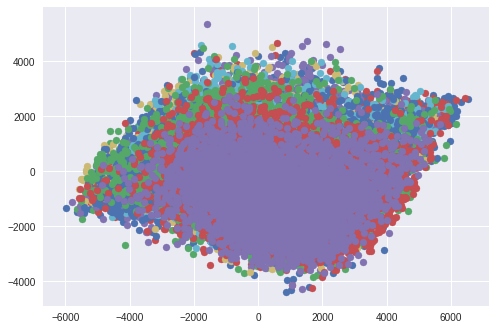

In [0]:
for i in range (0,10):
  plt.scatter(x_train_ordered[i][:,0],x_train_ordered[i][:,1])
  
plt.show()

## perform PCA

In [0]:
pca = PCA()  
pca.fit_transform(x_train_PCA)  

array([[-1.28020353e+01,  5.45807753e+00,  3.00342105e+00, ...,
        -1.52457565e-03, -2.32718647e-03, -6.99536801e-04],
       [ 1.65956677e+00, -1.89988644e+00,  1.20075052e+01, ...,
         2.16869177e-04,  1.15343077e-03, -1.54201185e-03],
       [ 1.54603996e+01, -2.30442047e+01, -5.50724101e+00, ...,
        -2.08920218e-03, -4.28211479e-04, -7.86939052e-04],
       ...,
       [ 1.41469317e+00, -2.26850425e+01, -7.87829757e-01, ...,
        -7.60683136e-04,  3.72864696e-03,  2.89570459e-03],
       [ 2.27358180e+01, -6.75195530e+00,  1.11323953e+01, ...,
        -9.34193663e-04,  1.48994593e-03, -3.34130112e-03],
       [ 8.38559291e+00, -2.36837696e+00, -8.89192594e+00, ...,
         1.93593652e-03,  4.80727943e-04, -5.61012447e-05]])

In [0]:
explained_variance = pca.explained_variance_ratio_ 


In [0]:
#We want to take vectors that explains 99% of variance

k = 0
total = sum(explained_variance)
sum_variance = 0

while(sum_variance / total < 0.99):
    sum_variance = sum_variance + explained_variance[k]
    k += 1
    
k


658

Then we apply the PCA model to the data

In [0]:
k=658
pca = PCA(n_components=k, whiten=True) 
X_train_PCA = pca.fit_transform(x_train_PCA)  
X_test_PCA = pca.fit_transform(x_test_PCA)  

## Predict class

###with logisitc regression

In [0]:
classifier_logit = LogisticRegression()
classifier_logit.fit(X_train_PCA, y_train_PCA)


# Predicting the Test set results
y_pred_logit = classifier_logit.predict(X_test_PCA)   

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


###with SVM

In [0]:
classifier_svm = svm.SVC()
classifier_svm.fit(X_train_PCA, y_train_PCA)


# Predicting the Test set results
y_pred_svm = classifier_svm.predict(X_test_PCA)  

## Results in accuracy measure

In [0]:
import sklearn as skl
from sklearn import metrics
from sklearn.metrics import accuracy_score

cm_logit = skl.metrics.confusion_matrix(y_test_PCA, y_pred_logit)  
print(cm_logit)  
skl.metrics.accuracy_score(y_test_PCA, y_pred_logit)

[[253  63  92  69  47  47  45 106 211  67]
 [ 49 179  58  79  52  34 123 119 132 175]
 [124  75 159  66 160  70 135 104  62  45]
 [111 114  60 114  79 133 145 115  62  67]
 [ 63  75 153  69 203  89 138 106  47  57]
 [118  86  79  85  74 220  99 112  81  46]
 [ 60 109  88  68 171  84 160 174  35  51]
 [ 75 126  56  76 111  97 126  89  94 150]
 [132 120  51  34  25  55  47  85 314 137]
 [ 67 152  27  51  31  34 103 113 167 255]]


0.1946

With the logistic regression classifier I have an accuracy of 20%

In [0]:

import sklearn as skl
from sklearn import metrics
from sklearn.metrics import accuracy_score

cm_svm = skl.metrics.confusion_matrix(y_test_PCA, y_pred_svm)  
print(cm_svm)  
skl.metrics.accuracy_score(y_test_PCA, y_pred_svm)

[[199  75 140  80  86  45  41  81 165  88]
 [ 37 257  25  65  28  34 101 106  67 280]
 [ 94  93 211  71 200  62  89  74  51  55]
 [ 70 128  78 161 110 102 117  97  51  86]
 [ 52  56 209 105 251  54 111  73  41  48]
 [ 84 100 103 124 111 170  87  92  58  71]
 [ 47 139  90  98 162  71 129 150  14 100]
 [ 49 165  54  91  89  82 119  90  62 199]
 [147 113  78  52  46  54  47  61 297 105]
 [ 38 219  17  44  31  24  79  93  93 362]]


0.2127

#Using KNN


The idea of KNN algorithm is to find, for each unlabeled data, its k nearest neighbors in the labeled dataset and then label the new data by taking the most recurent label in the neigbhors


## data prep

Here, i use a file where the data are already organised in batches

In [0]:
!ls "drive/My Drive/Colab Notebooks"	

 cifar-10-python				   'image classification.ipynb'
 cifar-10-python.tar.gz				    Untitled0.ipynb
'Copie de MSTC_Keras_FontReco_FeedFordward.ipynb'


In [0]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [0]:
# defining the K as in K-Nearest Neighbors
k=8

# length of test batch
len_test=100

In [0]:
test=unpickle("drive/My Drive/Colab Notebooks/cifar-10-python/cifar-10-batches-py/test_batch")
i=1
batch1=unpickle("drive/My Drive/Colab Notebooks/cifar-10-python/cifar-10-batches-py/data_batch_"+str(i))

we use the unpicke function define in the CIFAR 10 documentation. test is a dicionary 

In [0]:
test.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [0]:
# reading the test data and labels in seperate variables
test_data=test[b'data'][0:len_test]
test_labels=test[b'labels'][0:len_test]


## functions

In [0]:
# Euclidean distance
def euclidianDistance(x, y):
  return np.sqrt(np.sum(np.square(x-y)))

In [0]:
# find the k minimal values
def k_mins(x,k):
  minis=[]
  for i in range (0,k):
    m=max(x)
   
    for j in range (0,len(x)):
      if x[j]<m:
        m=x[j]
        
    minis.append(m)
    x.remove(m)
  return minis
  

a=[0,2,6,4,0,7]

minis=k_mins(a,3)
minis

[0, 0, 2]

In [0]:
def add_distance(distance, label, liste,k):
  
  # return a list of form [["distance1", "label1"],...,["distancek", "labelk"]]
 
  
  if len(liste)<k:
    liste.append([distance,label])
    
  else:
    # list of distances
    dist=[row[0] for row in liste]
    # index of max
    i=dist.index(max(dist))
    
    if distance < max(dist):
      liste.remove(liste[i])
      liste.append([distance,label])
   
 
  return liste
    
a=[[2, 4],[6, 3], [1, 5],[2, 5]]
add_distance(8, 1, a,5)

[[2, 4], [6, 3], [1, 5], [2, 5], [8, 1]]

In [0]:
def most_recurent_label(min_dist):
  k_labels= [0]*10
  
  #liste of labels
  labels=[row[1] for row in min_dist]
  for i in range (len(labels)):
    for j in range (0,10):
      if(labels[i]==j):
        k_labels[j]=k_labels[j]+1
        
  lab=k_labels.index(max(k_labels))
      
  return(lab)


In [0]:
a=[[2, 4], [6, 3], [1, 5], [2, 5], [8, 1]]
a=np.array(a)
a.shape
l=most_recurent_label(a)
print(l)

5


In [0]:
def most_recurent_element(labels):
  k_labels= [0]*10
  
  for i in range (len(labels)):
    for j in range (0,10):
      if(labels[i]==j):
        k_labels[j]=k_labels[j]+1
        
  lab=k_labels.index(max(k_labels))
      
  return(lab)


In [0]:
k_labels=[1,3,9,8,9,0]
print(k_labels.index(max(k_labels)))

2


## implementation

In [0]:
knn_labels=[0]*(len_test)

len(knn_labels)

100

In [0]:

def KNN(k):

  #loop through the data to be labeled
  for x in range(0,len_test):
    print(x)
    k_min_distance_x=[]
 
  
    #loop through the batched contening labeled data
    for i in range(1,6):
    
      min_distance_batch_i=[]
      batch_i=unpickle("drive/My Drive/Colab Notebooks/cifar-10-python/cifar-10-batches-py/data_batch_"+str(i))
      batch_i_data=batch_i[b'data']
      batch_i_labels=batch_i[b'labels']
    
      #loop through the labeled data
      for j in range(0,len(batch_i_data)):
        #calculate the euclidian distance between the data to label and the data of the batch
        distance=euclidianDistance(test_data[x], batch_i_data[j])
      
        #verify if the distance is in the k lowest and add (distance, data) if it is the case
        add_distance(distance,batch_i_labels[j], k_min_distance_x,k)
      
      # end loop through the labeled data
    
    
    #end loop through the labeled data
    knn_labels[x]=most_recurent_label(k_min_distance_x)
   
  return(knn_labels)  
    
      
      

## accuracy

In [0]:
acc=0
for i in range(0,len_test):
  if(knn_labels[i]==test_labels[i]):
    acc=acc+1
acc=acc/len_test*100

acc


10.0

In [0]:
# initializing correctly predicted counts for all labels


def give_accuracy(knn_labels):
  correct=[0,0,0,0,0,0,0,0,0,0]
  wrong=[0,0,0,0,0,0,0,0,0,0]
  # for every predicted label comparing it with the true label
  for i in range(0,len(knn_labels)):
    pair=([knn_labels[i],test_labels[i]])
    if int(knn_labels[i]) == test_labels[i]:
      #counting the correctly predicted lables
      correct[test_labels[i]]+=1
  
    else:
      #counting the wrongly predicted labels
      wrong[test_labels[i]]+=1
    
    
  accuracy=sum(correct)/len_test*100
  return(accuracy)




In [0]:
list_k=a = range(10,200,5)
accuracy_list=[0]*len(list_k)

for i in range (0,len(list_k)):
  labels=KNN(list_k[i])
  accuracy_list[i]=give_accuracy(labels)
  
plot(list_k, accuracy_list)

[21.0,
 20.0,
 23.0,
 27.0,
 24.0,
 27.0,
 24.0,
 25.0,
 26.0,
 25.0,
 25.0,
 24.0,
 25.0,
 24.0,
 25.0,
 26.0,
 23.0,
 24.0,
 26.0,
 27.0,
 25.0,
 26.0,
 25.0,
 24.0,
 25.0,
 26.0,
 25.0,
 26.0,
 26.0,
 24.0,
 25.0,
 22.0,
 21.0,
 22.0,
 24.0,
 0,
 0,
 0]

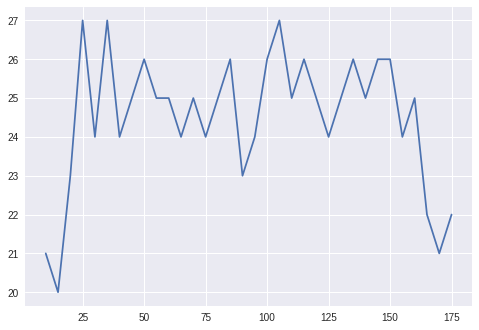

In [0]:
list_k=a = range(10,180,5)
plt.plot(list_k,accuracy_list[0:34])
accuracy_list


The maximum accuracy is 27%, which means about 1 every 3 images is correctly classified.
